<a href="https://colab.research.google.com/github/joyb05/Market-Basket-Analysis-Restaurant-Dataset/blob/main/Market_Basket_Analysis_Restaurant_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd. set_option("display.max_colwidth", None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Restaurant.csv")

In [4]:
df.head()

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Number    61727 non-null  int64  
 1   Item_Name       61727 non-null  object 
 2   Quantity        61727 non-null  int64  
 3   Product_Price   61727 non-null  float64
 4   Total_products  61727 non-null  int64  
 5   total_cost      61727 non-null  float64
 6   Date            61727 non-null  object 
 7   Time            61727 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 3.8+ MB


In [6]:
df.describe()

,Order_Number,Quantity,Product_Price,Total_products,total_cost
count,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000
mean,9081.128744,1.254200,6.066865,7.100426,47.225334
std,4050.603971,0.853417,3.101551,4.105486,45.561535
min,651.000000,1.000000,0.500000,1.000000,14.400000
25%,5543.000000,1.000000,2.950000,5.000000,23.700000
50%,9042.000000,1.000000,5.950000,6.000000,35.800000
75%,12601.000000,1.000000,8.950000,8.000000,55.650000
max,16118.000000,51.000000,17.950000,60.000000,1790.000000


In [7]:
df.isnull().sum()

Order_Number      0
Item_Name         0
Quantity          0
Product_Price     0
Total_products    0
total_cost        0
Date              0
Time              0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_Number    61727 non-null  int64         
 1   Item_Name       61727 non-null  object        
 2   Quantity        61727 non-null  int64         
 3   Product_Price   61727 non-null  float64       
 4   Total_products  61727 non-null  int64         
 5   total_cost      61727 non-null  float64       
 6   Date            61727 non-null  datetime64[ns]
 7   Time            61727 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.8+ MB


In [10]:
df['day'] = df['Date'].apply(lambda x:x.day)
df['month'] = df['Date'].apply(lambda x:x.month)
df['year'] = df['Date'].apply(lambda x:x.year)

In [11]:
df['date_name'] = df['Date'].dt.day_name()

In [12]:
df.loc[(df['month']>= 1) &(df['month'] <=2), 'season'] = "winter"
df.loc[(df['month']>= 3) &(df['month'] <=4), 'season'] = "spring"
df.loc[(df['month']>= 5) &(df['month'] <=6), 'season'] = "summer"
df.loc[(df['month']>= 7) &(df['month'] <=8), 'season'] = "monsoon"
df.loc[(df['month']>= 9) &(df['month'] <=10), 'season'] = "autumn"
df.loc[(df['month']>= 11) &(df['month'] <=12), 'season'] = "winter"

In [13]:
df.head().sort_values('season')

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time,day,month,year,date_name,season
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring


In [14]:
sns.set(rc = {'figure.figsize':(16,8)})

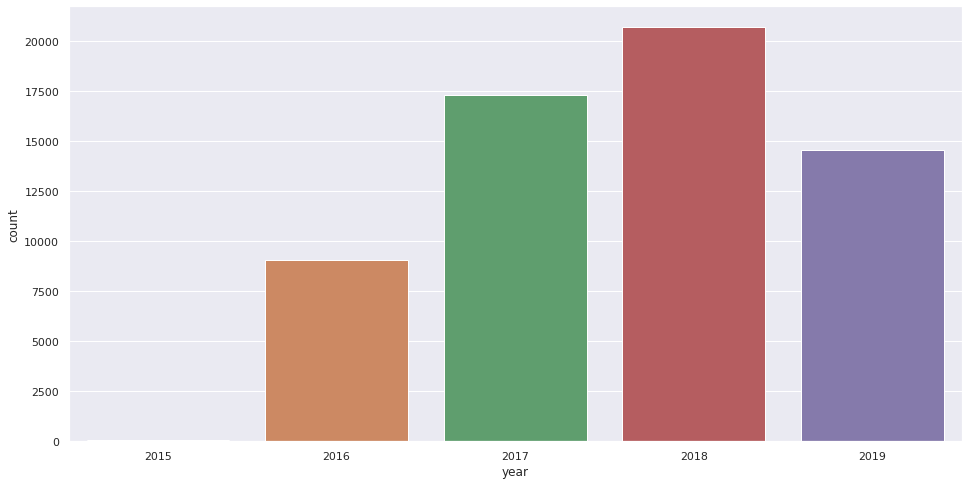

In [15]:
sns.countplot(x = 'year', data = df)

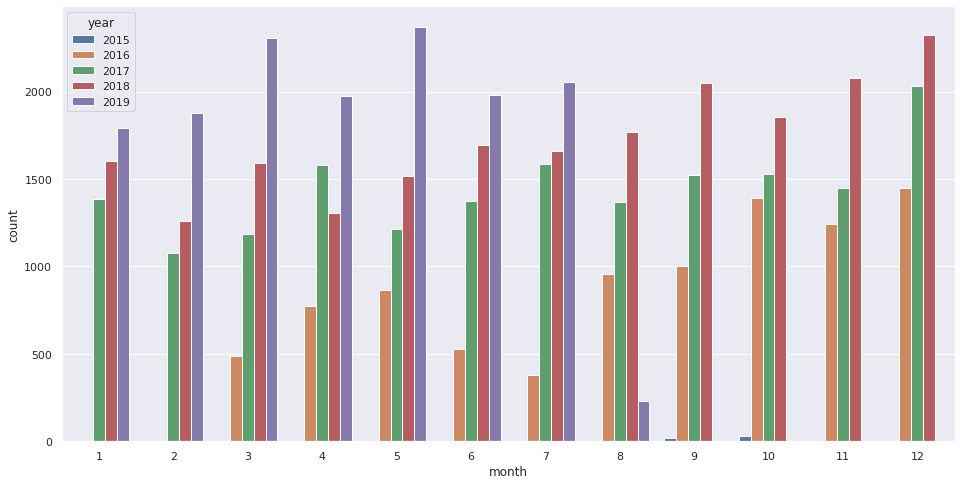

In [16]:
sns.countplot(x = 'month', hue = 'year', data = df)

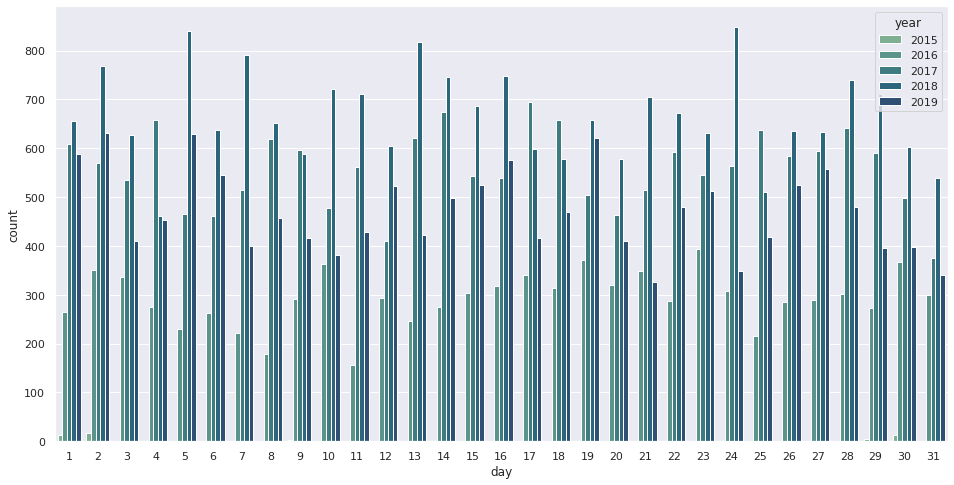

In [17]:
sns.countplot(x = 'day', data = df, hue = 'year', palette = 'crest')

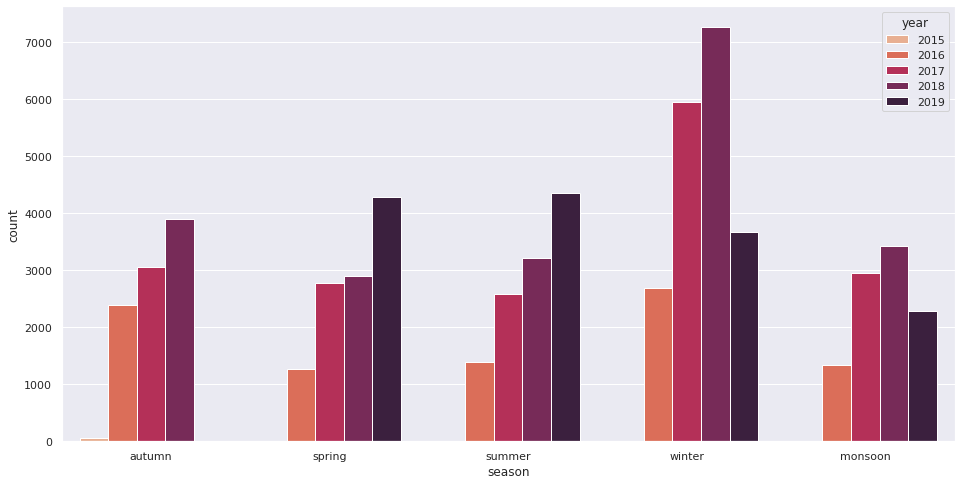

In [18]:
sns.countplot(x = 'season', data = df, hue = 'year', palette = 'rocket_r')

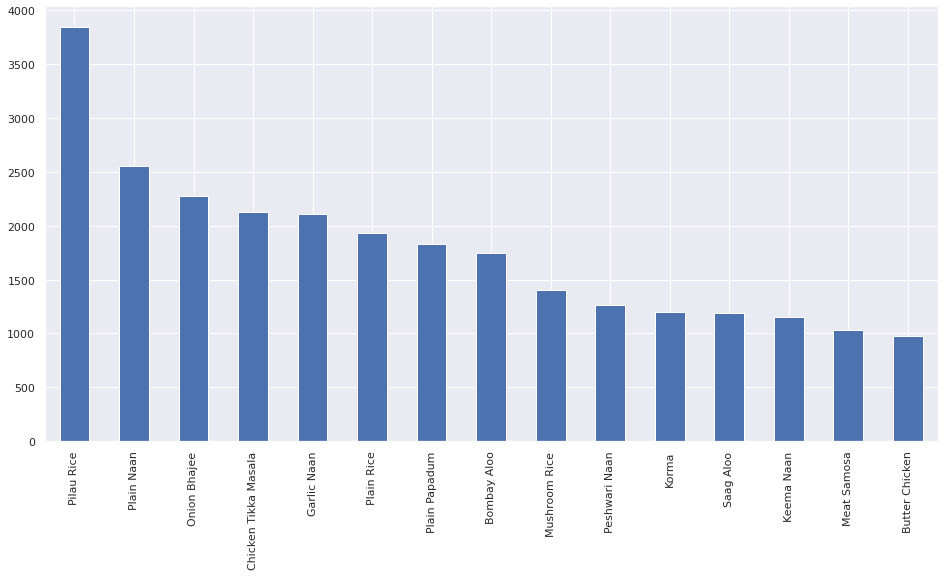

In [19]:
df['Item_Name'].value_counts()[:15].plot(kind = 'bar')
plt.show()

In [20]:
member = df
member

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time,day,month,year,date_name,season
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday,spring
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00,18,9,2017,Monday,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61722,8523,Plain Papadum,2,0.80,9,14.4,2018-02-14,22:57:00,14,2,2018,Wednesday,winter
61723,10315,Plain Papadum,2,0.80,9,14.4,2018-07-14,22:59:00,14,7,2018,Saturday,monsoon
61724,8013,Spicy Papadum,2,0.80,9,14.4,2017-12-31,20:38:00,31,12,2017,Sunday,winter
61725,8013,Plain Papadum,2,0.80,9,14.4,2017-12-31,20:38:00,31,12,2017,Sunday,winter


In [21]:
transactions_members = [a[1]['Item_Name'].tolist() for a in list(member.groupby('Order_Number'))]

In [22]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [23]:
te1 = TransactionEncoder()

In [24]:
te_ary1 = te1.fit(transactions_members).transform(transactions_members)

In [25]:
te1.columns_

['Aloo Chaat',
 'Aloo Gobi',
 'Aloo Methi',
 'Baingan Hari Mirch',
 'Bengal Fish Biryani',
 'Bengal Fish Karahi',
 'Bengal Fry Fish',
 'Bengal King Prawn',
 'Bengal Salad',
 'Bhindi Bhajee',
 'Bhuna',
 'Bhuna - Chicken',
 'Bhuna - Chicken Tikka',
 'Bhuna - King Prawn',
 'Bhuna - Lamb',
 'Bhuna - Prawn',
 'Bombay Aloo',
 'Bottle Coke',
 'Bottle Diet Coke',
 'Brinjal Bhajee',
 'Butter Chicken',
 'COBRA ( LARGE )',
 'COBRA (330ML)',
 'COBRA (660ML)',
 'Cauliflower Bhajee',
 'Chana Masala',
 'Chapati',
 'Chicken Achar',
 'Chicken Balti',
 'Chicken Biryani',
 'Chicken Chaat',
 'Chicken Chaat Main',
 'Chicken Chilli Garlic',
 'Chicken Hari Mirch',
 'Chicken Haryali',
 'Chicken Karahi',
 'Chicken Mysore',
 'Chicken Pakora',
 'Chicken Rezala',
 'Chicken Roshni',
 'Chicken Shashlick',
 'Chicken Shashlick Curry',
 'Chicken Sylhet',
 'Chicken Tikka',
 'Chicken Tikka (Main)',
 'Chicken Tikka Balti',
 'Chicken Tikka Biryani',
 'Chicken Tikka Chilli Masala',
 'Chicken Tikka Garlic',
 'Chicken Tikka 

In [26]:
a = te1.columns_

In [27]:
te_ary1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [28]:
transactions_members = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_members.describe()

In [29]:
transactions_members

,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,Bengal Fish Karahi,Bengal Fry Fish,Bengal King Prawn,Bengal Salad,Bhindi Bhajee,...,Vegetable Rice,Vegetable Roll,Vegetable Samosa,Vindaloo,Vindaloo - Chicken,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13084,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13085,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13086,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [30]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [31]:
import matplotlib.pyplot as plt

In [32]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.sort_values('support', ascending= False).head(10)

,support,itemsets
168,0.293857,(Pilau Rice)
169,0.195064,(Plain Naan)
151,0.174129,(Onion Bhajee)
51,0.162821,(Chicken Tikka Masala)
78,0.160987,(Garlic Naan)
171,0.147616,(Plain Rice)
170,0.139594,(Plain Papadum)
16,0.133634,(Bombay Aloo)
149,0.107350,(Mushroom Rice)
167,0.096883,(Peshwari Naan)


In [33]:
freq_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   6917 non-null   float64
 1   itemsets  6917 non-null   object 
dtypes: float64(1), object(1)
memory usage: 108.2+ KB


In [34]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [35]:
freq_items_1 = (freq_items1['length'] == 1)
freq_items1[freq_items_1].sort_values('support', ascending= False).head(10)

,support,itemsets,length
168,0.293857,(Pilau Rice),1
169,0.195064,(Plain Naan),1
151,0.174129,(Onion Bhajee),1
51,0.162821,(Chicken Tikka Masala),1
78,0.160987,(Garlic Naan),1
171,0.147616,(Plain Rice),1
170,0.139594,(Plain Papadum),1
16,0.133634,(Bombay Aloo),1
149,0.107350,(Mushroom Rice),1
167,0.096883,(Peshwari Naan),1


In [36]:
freq_items_2 = (freq_items1['length'] == 2)
freq_items1[freq_items_2].sort_values('support', ascending= False).head(10)

,support,itemsets,length
2294,0.096501,"(Pilau Rice, Plain Naan)",2
2295,0.078010,"(Pilau Rice, Plain Papadum)",2
1236,0.077094,"(Pilau Rice, Chicken Tikka Masala)",2
2171,0.076711,"(Pilau Rice, Onion Bhajee)",2
1560,0.073120,"(Pilau Rice, Garlic Naan)",2
512,0.059749,"(Pilau Rice, Bombay Aloo)",2
1237,0.053331,"(Plain Naan, Chicken Tikka Masala)",2
2337,0.052644,"(Plain Naan, Plain Rice)",2
2336,0.052109,"(Plain Naan, Plain Papadum)",2
2265,0.049435,"(Pilau Rice, Peshwari Naan)",2


In [37]:
freq_items_3 = (freq_items1['length'] == 3)
freq_items1[freq_items_3].sort_values('support', ascending= False).head(10)

,support,itemsets,length
3981,0.032855,"(Pilau Rice, Chicken Tikka Masala, Plain Naan)",3
5141,0.029722,"(Pilau Rice, Plain Papadum, Plain Naan)",3
5039,0.027659,"(Pilau Rice, Onion Bhajee, Plain Naan)",3
3982,0.025749,"(Pilau Rice, Plain Papadum, Chicken Tikka Masala)",3
3018,0.023762,"(Pilau Rice, Bombay Aloo, Plain Naan)",3
5040,0.022311,"(Pilau Rice, Plain Papadum, Onion Bhajee)",3
4437,0.021776,"(Pilau Rice, Plain Papadum, Garlic Naan)",3
3840,0.020553,"(Chicken Tikka Masala, Pilau Rice, Garlic Naan)",3
3957,0.020400,"(Pilau Rice, Chicken Tikka Masala, Onion Bhajee)",3
2835,0.019789,"(Chicken Tikka Masala, Pilau Rice, Bombay Aloo)",3


In [38]:
freq_items_4 = (freq_items1['length'] == 4)
freq_items1[freq_items_4].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6068,0.012683,"(Pilau Rice, Plain Papadum, Chicken Tikka Masala, Plain Naan)",4
5435,0.011232,"(Chicken Tikka Masala, Pilau Rice, Bombay Aloo, Plain Naan)",4
6049,0.010086,"(Pilau Rice, Chicken Tikka Masala, Onion Bhajee, Plain Naan)",4
6509,0.008787,"(Pilau Rice, Plain Papadum, Onion Bhajee, Plain Naan)",4
5585,0.008481,"(Pilau Rice, Plain Papadum, Bombay Aloo, Plain Naan)",4
6069,0.008175,"(Pilau Rice, Plain Rice, Chicken Tikka Masala, Plain Naan)",4
5916,0.008099,"(Chicken Tikka Masala, Pilau Rice, Plain Papadum, Garlic Naan)",4
5436,0.007488,"(Chicken Tikka Masala, Pilau Rice, Plain Papadum, Bombay Aloo)",4
5439,0.007335,"(Chicken Tikka Masala, Plain Naan, Plain Papadum, Bombay Aloo)",4
6050,0.006877,"(Pilau Rice, Plain Papadum, Chicken Tikka Masala, Onion Bhajee)",4


In [39]:
freq_items_5 = (freq_items1['length'] == 5)
freq_items1[freq_items_5].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6637,0.004661,"(Plain Papadum, Chicken Tikka Masala, Plain Naan, Pilau Rice, Bombay Aloo)",5
6607,0.003591,"(Plain Papadum, Chicken Tikka Masala, Garlic Naan, Pilau Rice, Bombay Aloo)",5
6803,0.003438,"(Plain Papadum, Chicken Tikka Masala, Plain Naan, Pilau Rice, Onion Bhajee)",5
6606,0.003362,"(Chicken Tikka Masala, Plain Naan, Garlic Naan, Pilau Rice, Bombay Aloo)",5
6813,0.003285,"(Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Pilau Rice)",5
6640,0.003209,"(Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Bombay Aloo)",5
6753,0.002903,"(Plain Papadum, Chicken Tikka Masala, Plain Naan, Garlic Naan, Pilau Rice)",5
6638,0.002827,"(Chicken Tikka Masala, Plain Naan, Plain Rice, Pilau Rice, Bombay Aloo)",5
6630,0.002751,"(Chicken Tikka Masala, Plain Naan, Pilau Rice, Bombay Aloo, Onion Bhajee)",5
6658,0.002598,"(Plain Papadum, Plain Naan, Garlic Naan, Pilau Rice, Bombay Aloo)",5


In [40]:
freq_items_6 = (freq_items1['length'] == 6)
freq_items1[freq_items_6].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6883,0.001987,"(Plain Papadum, Chicken Tikka Masala, Plain Naan, Garlic Naan, Pilau Rice, Bombay Aloo)",6
6885,0.001605,"(Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",6
6869,0.001528,"(Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Bombay Aloo)",6
6880,0.001452,"(Masala Sauce, Chicken Tikka Masala, Plain Naan, Garlic Naan, Pilau Rice, Bombay Aloo)",6
6905,0.001452,"(Special Fried Rice, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee)",6
6893,0.001452,"(Special Fried Rice, Plain Papadum, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",6
6886,0.001452,"(Special Fried Rice, Plain Papadum, Chicken Tikka Masala, Plain Naan, Mushroom Bhajee, Bombay Aloo)",6
6864,0.001452,"(Butter Chicken, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",6
6863,0.001452,"(Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Mushroom Bhajee, Bombay Aloo)",6
6894,0.001375,"(Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee)",6


In [41]:
freq_items_7 = (freq_items1['length'] == 7)
freq_items1[freq_items_7].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6907,0.001375,"(Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",7
6914,0.001375,"(Special Fried Rice, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",7
6908,0.001222,"(Special Fried Rice, Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Mushroom Bhajee, Bombay Aloo)",7
6909,0.001222,"(Special Fried Rice, Butter Chicken, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",7
6910,0.001222,"(Special Fried Rice, Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Rice, Mushroom Bhajee, Bombay Aloo)",7
6911,0.001222,"(Special Fried Rice, Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Bombay Aloo)",7
6912,0.001222,"(Special Fried Rice, Butter Chicken, Plain Papadum, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",7
6915,0.001222,"(Special Fried Rice, Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee)",7
6913,0.001070,"(Masala Sauce, Plain Papadum, Chicken Tikka Masala, Plain Naan, Garlic Naan, Pilau Rice, Bombay Aloo)",7


In [42]:
freq_items_8 = (freq_items1['length'] == 8)
freq_items1[freq_items_8].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6916,0.001222,"(Special Fried Rice, Butter Chicken, Plain Papadum, Chicken Tikka Masala, Plain Naan, Plain Rice, Mushroom Bhajee, Bombay Aloo)",8


In [43]:
rules1 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Aloo Chaat),0.133634,0.021241,0.001834,0.013722,0.646026,-0.001005,0.992377
1,(Aloo Chaat),(Bombay Aloo),0.021241,0.133634,0.001834,0.086331,0.646026,-0.001005,0.948228
2,(Aloo Chaat),(Chana Masala),0.021241,0.028881,0.001146,0.053957,1.868220,0.000533,1.026506
3,(Chana Masala),(Aloo Chaat),0.028881,0.021241,0.001146,0.039683,1.868220,0.000533,1.019204
4,(Chapati),(Aloo Chaat),0.050428,0.021241,0.001452,0.028788,1.355308,0.000381,1.007771
5,(Aloo Chaat),(Chapati),0.021241,0.050428,0.001452,0.068345,1.355308,0.000381,1.019232
6,(Chicken Chaat),(Aloo Chaat),0.025520,0.021241,0.001299,0.050898,2.396243,0.000757,1.031248
7,(Aloo Chaat),(Chicken Chaat),0.021241,0.025520,0.001299,0.061151,2.396243,0.000757,1.037952
8,(Chicken Tikka),(Aloo Chaat),0.052338,0.021241,0.002063,0.039416,1.855674,0.000951,1.018921
9,(Aloo Chaat),(Chicken Tikka),0.021241,0.052338,0.002063,0.097122,1.855674,0.000951,1.049602


In [44]:
top_support = rules1.sort_values('support', ascending= False)
top_support.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4149,(Plain Naan),(Pilau Rice),0.195064,0.293857,0.096501,0.494712,1.683513,0.039180,1.397506
4148,(Pilau Rice),(Plain Naan),0.293857,0.195064,0.096501,0.328393,1.683513,0.039180,1.198522
4150,(Pilau Rice),(Plain Papadum),0.293857,0.139594,0.078010,0.265471,1.901740,0.036990,1.171371
4151,(Plain Papadum),(Pilau Rice),0.139594,0.293857,0.078010,0.558840,1.901740,0.036990,1.600649
2032,(Pilau Rice),(Chicken Tikka Masala),0.293857,0.162821,0.077094,0.262350,1.611283,0.029247,1.134928
2033,(Chicken Tikka Masala),(Pilau Rice),0.162821,0.293857,0.077094,0.473487,1.611283,0.029247,1.341168
3903,(Onion Bhajee),(Pilau Rice),0.174129,0.293857,0.076711,0.440544,1.499179,0.025542,1.262196
3902,(Pilau Rice),(Onion Bhajee),0.293857,0.174129,0.076711,0.261050,1.499179,0.025542,1.117628
2681,(Garlic Naan),(Pilau Rice),0.160987,0.293857,0.073120,0.454200,1.545651,0.025813,1.293777
2680,(Pilau Rice),(Garlic Naan),0.293857,0.160987,0.073120,0.248830,1.545651,0.025813,1.116941


In [45]:
top_confidence = rules1.sort_values('confidence', ascending= False)
top_confidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51862,"(Masala Sauce, Plain Papadum, Chicken Tikka Masala, Plain Naan, Garlic Naan, Pilau Rice)",(Bombay Aloo),0.001070,0.133634,0.001070,1.0,7.483133,0.000927,inf
49184,"(Special Fried Rice, Butter Chicken, Plain Papadum, Plain Rice, Mushroom Bhajee)",(Bombay Aloo),0.001222,0.133634,0.001222,1.0,7.483133,0.001059,inf
49438,"(Masala Sauce, Chicken Tikka Masala, Garlic Naan, Plain Naan)","(Pilau Rice, Bombay Aloo)",0.001452,0.059749,0.001452,1.0,16.736573,0.001365,inf
50182,"(Masala Sauce, Plain Naan, Plain Papadum, Garlic Naan)","(Pilau Rice, Bombay Aloo)",0.001222,0.059749,0.001222,1.0,16.736573,0.001149,inf
51769,"(Special Fried Rice, Butter Chicken, Plain Naan, Mushroom Bhajee)","(Bombay Aloo, Plain Papadum, Plain Rice)",0.001222,0.006800,0.001222,1.0,147.056180,0.001214,inf
39558,"(Special Fried Rice, Butter Chicken, Chicken Tikka Masala, Mushroom Bhajee)",(Bombay Aloo),0.001222,0.133634,0.001222,1.0,7.483133,0.001059,inf
39560,"(Special Fried Rice, Butter Chicken, Mushroom Bhajee, Bombay Aloo)",(Chicken Tikka Masala),0.001222,0.162821,0.001222,1.0,6.141718,0.001023,inf
21915,"(Prawn Puree, Bhuna - Chicken Tikka, Saag Bhajee)",(Plain Rice),0.001987,0.147616,0.001987,1.0,6.774327,0.001693,inf
43610,"(Special Fried Rice, Butter Chicken, Plain Naan, Plain Rice)",(Plain Papadum),0.001222,0.139594,0.001222,1.0,7.163656,0.001052,inf
49185,"(Special Fried Rice, Butter Chicken, Plain Papadum, Plain Rice, Bombay Aloo)",(Mushroom Bhajee),0.001222,0.025061,0.001222,1.0,39.902439,0.001192,inf


In [46]:
top_lift = rules1.sort_values('lift', ascending= False)
top_lift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52396,"(Mushroom Bhajee, Bombay Aloo, Plain Papadum, Plain Rice)","(Special Fried Rice, Butter Chicken, Chicken Tikka Masala, Plain Naan)",0.001681,0.001222,0.001222,0.727273,594.909091,0.00122,3.662184
52337,"(Special Fried Rice, Butter Chicken, Chicken Tikka Masala, Plain Naan)","(Mushroom Bhajee, Bombay Aloo, Plain Papadum, Plain Rice)",0.001222,0.001681,0.001222,1.000000,594.909091,0.00122,inf
52374,"(Mushroom Bhajee, Butter Chicken, Plain Papadum, Plain Rice)","(Special Fried Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan)",0.001375,0.001528,0.001222,0.888889,581.688889,0.00122,8.986247
52359,"(Special Fried Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan)","(Mushroom Bhajee, Butter Chicken, Plain Papadum, Plain Rice)",0.001528,0.001375,0.001222,0.800000,581.688889,0.00122,4.993123
52435,"(Butter Chicken, Mushroom Bhajee, Plain Rice)","(Special Fried Rice, Plain Papadum, Chicken Tikka Masala, Plain Naan, Bombay Aloo)",0.001452,0.001452,0.001222,0.842105,580.077562,0.00122,6.324139
52298,"(Special Fried Rice, Plain Papadum, Chicken Tikka Masala, Plain Naan, Bombay Aloo)","(Butter Chicken, Mushroom Bhajee, Plain Rice)",0.001452,0.001452,0.001222,0.842105,580.077562,0.00122,6.324139
51443,"(Butter Chicken, Mushroom Bhajee, Plain Rice)","(Special Fried Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan)",0.001452,0.001528,0.001222,0.842105,551.073684,0.00122,6.323655
52386,"(Butter Chicken, Mushroom Bhajee, Plain Rice, Bombay Aloo)","(Special Fried Rice, Chicken Tikka Masala, Plain Papadum, Plain Naan)",0.001452,0.001528,0.001222,0.842105,551.073684,0.00122,6.323655
52347,"(Special Fried Rice, Chicken Tikka Masala, Plain Papadum, Plain Naan)","(Butter Chicken, Mushroom Bhajee, Plain Rice, Bombay Aloo)",0.001528,0.001452,0.001222,0.800000,551.073684,0.00122,4.992741
52201,"(Butter Chicken, Mushroom Bhajee, Plain Rice)","(Special Fried Rice, Chicken Tikka Masala, Plain Papadum, Plain Naan)",0.001452,0.001528,0.001222,0.842105,551.073684,0.00122,6.323655


In [47]:
df1 = df['season'] == 'winter'

In [48]:
winter = df.loc[df1].sort_values('Date', ascending = True)

In [49]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(winter.groupby('Order_Number'))]

In [50]:
te1 = TransactionEncoder()

In [51]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [52]:
a = te1.columns_

In [53]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [54]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [55]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.016614,(Aloo Chaat)
1,0.047398,(Aloo Gobi)
2,0.002932,(Aloo Methi)
3,0.015392,(Baingan Hari Mirch)
4,0.002443,(Bengal Fish Biryani)
5,0.001710,(Bengal Fry Fish)
6,0.008796,(Bengal King Prawn)


In [56]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [57]:
freq_items1.head()

,support,itemsets,length
0,0.016614,(Aloo Chaat),1
1,0.047398,(Aloo Gobi),1
2,0.002932,(Aloo Methi),1
3,0.015392,(Baingan Hari Mirch),1
4,0.002443,(Bengal Fish Biryani),1


In [58]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Aloo Chaat),0.139018,0.016614,0.001466,0.010545,0.634705,-0.000844,0.993866
1,(Aloo Chaat),(Bombay Aloo),0.016614,0.139018,0.001466,0.088235,0.634705,-0.000844,0.944303
2,(Aloo Chaat),(Chana Masala),0.016614,0.031517,0.001710,0.102941,3.266188,0.001187,1.079620
3,(Chana Masala),(Aloo Chaat),0.031517,0.016614,0.001710,0.054264,3.266188,0.001187,1.039810
4,(Chapati),(Aloo Chaat),0.054728,0.016614,0.001955,0.035714,2.149685,0.001045,1.019808
5,(Aloo Chaat),(Chapati),0.016614,0.054728,0.001955,0.117647,2.149685,0.001045,1.071309
6,(Chicken Tikka Masala),(Aloo Chaat),0.174688,0.016614,0.002443,0.013986,0.841835,-0.000459,0.997335
7,(Aloo Chaat),(Chicken Tikka Masala),0.016614,0.174688,0.002443,0.147059,0.841835,-0.000459,0.967607
8,(Garlic Naan),(Aloo Chaat),0.172734,0.016614,0.003420,0.019802,1.191904,0.000551,1.003253
9,(Aloo Chaat),(Garlic Naan),0.016614,0.172734,0.003420,0.205882,1.191904,0.000551,1.041742


In [59]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4035,(Plain Naan),(Pilau Rice),0.206206,0.306132,0.102614,0.497630,1.625539,0.039488,1.381189
4034,(Pilau Rice),(Plain Naan),0.306132,0.206206,0.102614,0.335196,1.625539,0.039488,1.194027
1922,(Pilau Rice),(Chicken Tikka Masala),0.306132,0.174688,0.086245,0.281724,1.612721,0.032767,1.149017
1923,(Chicken Tikka Masala),(Pilau Rice),0.174688,0.306132,0.086245,0.493706,1.612721,0.032767,1.370484
2551,(Garlic Naan),(Pilau Rice),0.172734,0.306132,0.080381,0.465347,1.520082,0.027502,1.297789
2550,(Pilau Rice),(Garlic Naan),0.306132,0.172734,0.080381,0.262570,1.520082,0.027502,1.121823
4036,(Pilau Rice),(Plain Papadum),0.306132,0.143660,0.079648,0.260176,1.811052,0.035669,1.157491
4037,(Plain Papadum),(Pilau Rice),0.143660,0.306132,0.079648,0.554422,1.811052,0.035669,1.557230
3777,(Onion Bhajee),(Pilau Rice),0.181774,0.306132,0.079404,0.436828,1.426925,0.023757,1.232070
3776,(Pilau Rice),(Onion Bhajee),0.306132,0.181774,0.079404,0.259377,1.426925,0.023757,1.104782


In [60]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34377,"(Chicken Balti, Korma - Chicken, Plain Naan)",(Pilau Rice),0.001466,0.306132,0.001466,1.0,3.266560,0.001017,inf
66856,"(Saag Aloo, Plain Naan, Curry, Tandoori Mixed Grill)",(Plain Papadum),0.002199,0.143660,0.002199,1.0,6.960884,0.001883,inf
79254,"(Plain Papadum, Dhansak, Chicken Tikka Masala, Garlic Naan, Baingan Hari Mirch, Pilau Rice)",(Bombay Aloo),0.001466,0.139018,0.001466,1.0,7.193322,0.001262,inf
42384,"(Saag Aloo, Dhansak - Chicken, Curry - Chicken)",(Plain Naan),0.001222,0.206206,0.001222,1.0,4.849526,0.000970,inf
54769,"(Masala Sauce, Dhansak, Chicken Tikka Masala)","(Pilau Rice, Bombay Aloo)",0.001466,0.062790,0.001466,1.0,15.926070,0.001374,inf
27362,"(Curry, Chicken Tikka Masala, Bombay Aloo)",(Pilau Rice),0.001710,0.306132,0.001710,1.0,3.266560,0.001187,inf
81545,"(Madras, Chicken Tikka Masala, Plain Rice, Plain Naan, Keema Naan)","(Pilau Rice, Peshwari Naan)",0.001222,0.050086,0.001222,1.0,19.965854,0.001160,inf
66886,"(Special Fried Rice, Plain Naan, Curry, Tandoori Mixed Grill)",(Plain Papadum),0.002443,0.143660,0.002443,1.0,6.960884,0.002092,inf
66885,"(Special Fried Rice, Plain Papadum, Curry, Tandoori Mixed Grill)",(Plain Naan),0.002443,0.206206,0.002443,1.0,4.849526,0.001939,inf
66884,"(Special Fried Rice, Plain Papadum, Plain Naan, Curry)",(Tandoori Mixed Grill),0.002443,0.053750,0.002443,1.0,18.604545,0.002312,inf


In [61]:
top_lift2 = rules2.sort_values('lift', ascending= False)
top_lift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52380,"(Aloo Gobi, Cauliflower Bhajee)","(Chicken Tikka, Chicken Tikka (Main), Saag Bhajee)",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
81202,"(Pilau Rice, Tandoori Fish, Keema Naan, Onion Bhajee)","(Butter Chicken, Paratha, Chicken Tikka (Main))",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
81235,"(Tandoori Fish, Keema Naan, Onion Bhajee)","(Pilau Rice, Butter Chicken, Paratha, Chicken Tikka (Main))",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
76129,"(Tandoori Fish, Keema Naan, Onion Bhajee)","(Butter Chicken, Paratha, Chicken Tikka (Main))",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
81233,"(Pilau Rice, Tandoori Fish, Onion Bhajee)","(Butter Chicken, Paratha, Chicken Tikka (Main), Keema Naan)",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
52377,"(Chicken Tikka, Chicken Tikka (Main), Saag Bhajee)","(Aloo Gobi, Cauliflower Bhajee)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
76315,"(Pilau Rice, Tandoori Fish, Onion Bhajee)","(Butter Chicken, Paratha, Chicken Tikka (Main))",0.001710,0.001222,0.001222,0.714286,584.714286,0.00122,3.495724
81215,"(Butter Chicken, Tandoori Fish, Chicken Tikka (Main))","(Pilau Rice, Paratha, Keema Naan, Onion Bhajee)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
81214,"(Butter Chicken, Tandoori Fish, Onion Bhajee)","(Pilau Rice, Paratha, Chicken Tikka (Main), Keema Naan)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf
81211,"(Butter Chicken, Paratha, Chicken Tikka (Main))","(Pilau Rice, Tandoori Fish, Keema Naan, Onion Bhajee)",0.001222,0.001710,0.001222,1.000000,584.714286,0.00122,inf


In [62]:
df1 = df['season'] == 'spring'

In [63]:
spring = df.loc[df1].sort_values('Date', ascending = True)

In [64]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(spring.groupby('Order_Number'))]

In [65]:
te1 = TransactionEncoder()

In [66]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [67]:
a = te1.columns_

In [68]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [69]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [70]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.021294,(Aloo Chaat)
1,0.036326,(Aloo Gobi)
2,0.002923,(Aloo Methi)
3,0.014614,(Baingan Hari Mirch)
4,0.001253,(Bengal Fish Karahi)
5,0.001670,(Bengal Fry Fish)
6,0.006681,(Bengal King Prawn)


In [71]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [72]:
freq_items1.head()

,support,itemsets,length
0,0.021294,(Aloo Chaat),1
1,0.036326,(Aloo Gobi),1
2,0.002923,(Aloo Methi),1
3,0.014614,(Baingan Hari Mirch),1
4,0.001253,(Bengal Fish Karahi),1


In [73]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chapati),(Aloo Chaat),0.044676,0.021294,0.001253,0.028037,1.316658,0.000301,1.006938
1,(Aloo Chaat),(Chapati),0.021294,0.044676,0.001253,0.058824,1.316658,0.000301,1.015031
2,(Aloo Chaat),(Chicken Biryani),0.021294,0.051775,0.001253,0.058824,1.136148,0.000150,1.007490
3,(Chicken Biryani),(Aloo Chaat),0.051775,0.021294,0.001253,0.024194,1.136148,0.000150,1.002971
4,(Chicken Tikka),(Aloo Chaat),0.060125,0.021294,0.002088,0.034722,1.630583,0.000807,1.013911
5,(Aloo Chaat),(Chicken Tikka),0.021294,0.060125,0.002088,0.098039,1.630583,0.000807,1.042035
6,(Egg Rice),(Aloo Chaat),0.026305,0.021294,0.001670,0.063492,2.981637,0.001110,1.045059
7,(Aloo Chaat),(Egg Rice),0.021294,0.026305,0.001670,0.078431,2.981637,0.001110,1.056563
8,(Garlic Naan),(Aloo Chaat),0.164927,0.021294,0.001670,0.010127,0.475552,-0.001842,0.988718
9,(Aloo Chaat),(Garlic Naan),0.021294,0.164927,0.001670,0.078431,0.475552,-0.001842,0.906143


In [74]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4284,(Pilau Rice),(Plain Naan),0.291441,0.182463,0.092276,0.316619,1.735246,0.039098,1.196311
4285,(Plain Naan),(Pilau Rice),0.182463,0.291441,0.092276,0.505721,1.735246,0.039098,1.433521
4286,(Pilau Rice),(Plain Papadum),0.291441,0.146555,0.086430,0.296562,2.023547,0.043718,1.213247
4287,(Plain Papadum),(Pilau Rice),0.146555,0.291441,0.086430,0.589744,2.023547,0.043718,1.727114
4019,(Onion Bhajee),(Pilau Rice),0.182881,0.291441,0.081420,0.445205,1.527603,0.028121,1.277157
4018,(Pilau Rice),(Onion Bhajee),0.291441,0.182881,0.081420,0.279370,1.527603,0.028121,1.133895
2083,(Chicken Tikka Masala),(Pilau Rice),0.172443,0.291441,0.079332,0.460048,1.578533,0.029075,1.312265
2082,(Pilau Rice),(Chicken Tikka Masala),0.291441,0.172443,0.079332,0.272206,1.578533,0.029075,1.137077
2759,(Garlic Naan),(Pilau Rice),0.164927,0.291441,0.075157,0.455696,1.563599,0.027090,1.301772
2758,(Pilau Rice),(Garlic Naan),0.291441,0.164927,0.075157,0.257880,1.563599,0.027090,1.125253


In [75]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149212,"(Butter Chicken, Korma - Chicken, Curry - Chicken, Plain Naan)","(Pilau Rice, Saag - Lamb)",0.001670,0.004593,0.001670,1.0,217.727273,0.001662,inf
293193,"(Plain Papadum, Chicken Tikka (Main), Meat Samosa, Peshwari Naan)","(Bhuna - Chicken Tikka, French Fries, Pilau Rice, Onion Bhajee)",0.001253,0.003340,0.001253,1.0,299.375000,0.001248,inf
359480,"(Butter Chicken, Korma - Chicken, Persian Chicken Biryani, Mushroom Rice)","(Paratha, Meat Samosa, Plain Naan, Curry - Chicken, Pilau Rice)",0.001253,0.001670,0.001253,1.0,598.750000,0.001251,inf
203764,"(Plain Papadum, Chicken Tikka Jalfrezi, Bhuna - Chicken Tikka, Onion Bhajee, French Fries)","(Vegetable Roll, Chapati)",0.002088,0.006263,0.002088,1.0,159.666667,0.002075,inf
203765,"(Plain Papadum, Chicken Tikka Jalfrezi, Bhuna - Chicken Tikka, Vegetable Roll, French Fries)","(Chapati, Onion Bhajee)",0.002088,0.012109,0.002088,1.0,82.586207,0.002062,inf
359483,"(Butter Chicken, Plain Naan, Persian Chicken Biryani, Mushroom Rice)","(Paratha, Meat Samosa, Korma - Chicken, Curry - Chicken, Pilau Rice)",0.001253,0.001670,0.001253,1.0,598.750000,0.001251,inf
203766,"(Plain Papadum, Chicken Tikka Jalfrezi, Onion Bhajee, Vegetable Roll, French Fries)","(Bhuna - Chicken Tikka, Chapati)",0.002088,0.003758,0.002088,1.0,266.111111,0.002080,inf
359485,"(Butter Chicken, Persian Chicken Biryani, Curry - Chicken, Mushroom Rice)","(Paratha, Meat Samosa, Korma - Chicken, Plain Naan, Pilau Rice)",0.001253,0.001670,0.001253,1.0,598.750000,0.001251,inf
359486,"(Butter Chicken, Pilau Rice, Persian Chicken Biryani, Mushroom Rice)","(Paratha, Meat Samosa, Korma - Chicken, Plain Naan, Curry - Chicken)",0.001253,0.001670,0.001253,1.0,598.750000,0.001251,inf
359489,"(Butter Chicken, Korma - Chicken, Persian Chicken Biryani, Plain Naan)","(Paratha, Meat Samosa, Mushroom Rice, Curry - Chicken, Pilau Rice)",0.001253,0.001670,0.001253,1.0,598.750000,0.001251,inf


In [76]:
top_lift2 = rules2.sort_values('lift', ascending= False)
top_lift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
70055,"(Vindaloo - Chicken, Tarka Dall)","(Chicken Tikka Jalfrezi, Aloo Gobi, Plain Naan)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
104272,"(Keema Naan, Royal Paneer, Plain Rice)","(Chicken Tikka Jeera, Plain Papadum)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
70048,"(Chicken Tikka Jalfrezi, Plain Naan, Vindaloo - Chicken)","(Aloo Gobi, Tarka Dall)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
70042,"(Chicken Tikka Jalfrezi, Aloo Gobi, Plain Naan)","(Vindaloo - Chicken, Tarka Dall)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
70040,"(Aloo Gobi, Tarka Dall, Plain Naan)","(Chicken Tikka Jalfrezi, Vindaloo - Chicken)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
94328,"(Mushroom Bhajee, Chicken Tikka Garlic)","(Special Fried Rice, Plain Papadum, Chapati)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
175791,"(Chicken Tikka Jeera, Plain Rice)","(Pilau Rice, Keema Naan, Royal Paneer, Garlic Naan)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
258751,"(Keema Naan, Royal Paneer, Plain Rice)","(Chicken Tikka Jeera, Plain Papadum, Garlic Naan, Onion Bhajee)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
70027,"(Chicken Tikka Jalfrezi, Vindaloo - Chicken)","(Pilau Rice, Aloo Gobi, Tarka Dall)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf
70019,"(Aloo Gobi, Tarka Dall)","(Chicken Tikka Jalfrezi, Pilau Rice, Vindaloo - Chicken)",0.001253,0.001253,0.001253,1.0,798.333333,0.001251,inf


In [77]:
df1 = df['season'] == 'summer'

In [78]:
summer = df.loc[df1].sort_values('Date', ascending = True)

In [79]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(summer.groupby('Order_Number'))]

In [80]:
te1 = TransactionEncoder()

In [81]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [82]:
a = te1.columns_

In [83]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [84]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [85]:
freq_items1 = apriori(transactions_six, min_support=0.1, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.136605,(Bombay Aloo)
1,0.149284,(Chicken Tikka Masala)
2,0.143558,(Garlic Naan)
3,0.171779,(Onion Bhajee)
4,0.282618,(Pilau Rice)
5,0.189366,(Plain Naan)
6,0.124744,(Plain Papadum)


In [86]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [87]:
freq_items1.head()

,support,itemsets,length
0,0.136605,(Bombay Aloo),1
1,0.149284,(Chicken Tikka Masala),1
2,0.143558,(Garlic Naan),1
3,0.171779,(Onion Bhajee),1
4,0.282618,(Pilau Rice),1


In [88]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [89]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [90]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [91]:
top_confidence2 = rules2.sort_values('lift', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


## The buying pattern in Spring changes as we can see, whole milk, other vegetables, yogurt, soda, fruits products are found to have the highest support. Sausage, candy, other vegetables products have higher confidence and lift but need to encourage buying this product as these products can provide boost to business.

In [92]:
df1 = df['season'] == 'monsoon'

In [93]:
monsoon = df.loc[df1].sort_values('Date', ascending = True)

In [94]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(monsoon.groupby('Order_Number'))]

In [95]:
te1 = TransactionEncoder()

In [96]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [97]:
a = te1.columns_

In [98]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [99]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [100]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.022008,(Aloo Chaat)
1,0.049977,(Aloo Gobi)
2,0.001376,(Aloo Methi)
3,0.011463,(Baingan Hari Mirch)
4,0.002293,(Bengal Fish Biryani)
5,0.001376,(Bengal Fry Fish)
6,0.006419,(Bengal King Prawn)


In [101]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [102]:
freq_items1.head()

,support,itemsets,length
0,0.022008,(Aloo Chaat),1
1,0.049977,(Aloo Gobi),1
2,0.001376,(Aloo Methi),1
3,0.011463,(Baingan Hari Mirch),1
4,0.002293,(Bengal Fish Biryani),1


In [103]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Aloo Chaat),0.129757,0.022008,0.001376,0.010601,0.481670,-0.001480,0.988470
1,(Aloo Chaat),(Bombay Aloo),0.022008,0.129757,0.001376,0.062500,0.481670,-0.001480,0.928259
2,(Aloo Chaat),(Chana Masala),0.022008,0.027969,0.001834,0.083333,2.979508,0.001218,1.060398
3,(Chana Masala),(Aloo Chaat),0.027969,0.022008,0.001834,0.065574,2.979508,0.001218,1.046623
4,(Chicken Chaat),(Aloo Chaat),0.024301,0.022008,0.001376,0.056604,2.571934,0.000841,1.036671
5,(Aloo Chaat),(Chicken Chaat),0.022008,0.024301,0.001376,0.062500,2.571934,0.000841,1.040746
6,(Chicken Tikka),(Aloo Chaat),0.046768,0.022008,0.002293,0.049020,2.227328,0.001263,1.028404
7,(Aloo Chaat),(Chicken Tikka),0.022008,0.046768,0.002293,0.104167,2.227328,0.001263,1.064073
8,(Chicken Tikka (Main)),(Aloo Chaat),0.069234,0.022008,0.001834,0.026490,1.203642,0.000310,1.004604
9,(Aloo Chaat),(Chicken Tikka (Main)),0.022008,0.069234,0.001834,0.083333,1.203642,0.000310,1.015381


In [104]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4046,(Pilau Rice),(Plain Naan),0.282898,0.187987,0.096286,0.340357,1.810531,0.043105,1.230988
4047,(Plain Naan),(Pilau Rice),0.187987,0.282898,0.096286,0.512195,1.810531,0.043105,1.470060
3801,(Onion Bhajee),(Pilau Rice),0.162769,0.282898,0.074278,0.456338,1.613085,0.028231,1.319022
3800,(Pilau Rice),(Onion Bhajee),0.282898,0.162769,0.074278,0.262561,1.613085,0.028231,1.135322
4048,(Pilau Rice),(Plain Papadum),0.282898,0.131591,0.071985,0.254457,1.933696,0.034759,1.164801
4049,(Plain Papadum),(Pilau Rice),0.131591,0.282898,0.071985,0.547038,1.933696,0.034759,1.583141
2605,(Garlic Naan),(Pilau Rice),0.150848,0.282898,0.069234,0.458967,1.622376,0.026560,1.325431
2604,(Pilau Rice),(Garlic Naan),0.282898,0.150848,0.069234,0.244733,1.622376,0.026560,1.124306
2002,(Pilau Rice),(Chicken Tikka Masala),0.282898,0.152224,0.065566,0.231767,1.522539,0.022502,1.103540
2003,(Chicken Tikka Masala),(Pilau Rice),0.152224,0.282898,0.065566,0.430723,1.522539,0.022502,1.259672


In [105]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60710,"(Tandoori Roti, Chicken Chaat, Plain Papadum)","(Plain Rice, Tandoori Mixed Grill)",0.002293,0.011004,0.002293,1.0,90.875000,0.002267,inf
56321,"(Korma - Chicken, Garlic Naan, Onion Bhajee, Plain Naan)",(Bombay Aloo),0.001376,0.129757,0.001376,1.0,7.706714,0.001197,inf
56261,"(Mushroom Rice, Korma - Chicken, Plain Rice, Bombay Aloo)",(Garlic Naan),0.001376,0.150848,0.001376,1.0,6.629179,0.001168,inf
56263,"(Garlic Naan, Mushroom Rice, Plain Rice, Bombay Aloo)",(Korma - Chicken),0.001376,0.082072,0.001376,1.0,12.184358,0.001263,inf
56269,"(Mushroom Rice, Plain Rice, Bombay Aloo)","(Korma - Chicken, Garlic Naan)",0.001376,0.010546,0.001376,1.0,94.826087,0.001361,inf
100721,"(Chicken Tikka Jalfrezi, Plain Naan, King Prawn Balti, Pilau Rice, Vegetable Roll, Tandoori Chicken (Main))",(Egg Rice),0.001376,0.020174,0.001376,1.0,49.568182,0.001348,inf
100720,"(Chicken Tikka Jalfrezi, Plain Naan, King Prawn Balti, Egg Rice, Vegetable Roll, Tandoori Chicken (Main))",(Pilau Rice),0.001376,0.282898,0.001376,1.0,3.534846,0.000986,inf
100719,"(Chicken Tikka Jalfrezi, Plain Naan, King Prawn Balti, Egg Rice, Pilau Rice, Tandoori Chicken (Main))",(Vegetable Roll),0.001376,0.023842,0.001376,1.0,41.942308,0.001343,inf
100718,"(Chicken Tikka Jalfrezi, Plain Naan, King Prawn Balti, Egg Rice, Pilau Rice, Vegetable Roll)",(Tandoori Chicken (Main)),0.001376,0.025218,0.001376,1.0,39.654545,0.001341,inf
100707,"(Vegetable Roll, King Prawn Balti)","(Saag Aloo, Chicken Tikka Jalfrezi, Plain Naan, Egg Rice, Pilau Rice)",0.001376,0.001376,0.001376,1.0,727.000000,0.001374,inf


In [106]:
top_confidence2 = rules2.sort_values('lift', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93371,"(Chicken Tikka Jalfrezi, Vegetable Roll, Tandoori Chicken (Main))","(Bhuna, Pilau Rice, King Prawn Balti, Onion Bhajee)",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
102003,"(Chicken Tikka Jalfrezi, Plain Naan, Pilau Rice, Onion Bhajee, Vegetable Roll)","(Saag Aloo, King Prawn Balti)",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
101942,"(Tandoori Chicken (Main), Plain Naan, King Prawn Balti)","(Saag Aloo, Chicken Tikka Jalfrezi, Pilau Rice, Onion Bhajee)",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
101946,"(Pilau Rice, King Prawn Balti, Onion Bhajee)","(Saag Aloo, Chicken Tikka Jalfrezi, Plain Naan, Tandoori Chicken (Main))",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
101947,"(Tandoori Chicken (Main), Pilau Rice, King Prawn Balti)","(Saag Aloo, Chicken Tikka Jalfrezi, Plain Naan, Onion Bhajee)",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
101948,"(Tandoori Chicken (Main), King Prawn Balti, Onion Bhajee)","(Saag Aloo, Pilau Rice, Chicken Tikka Jalfrezi, Plain Naan)",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
101952,"(Saag Aloo, King Prawn Balti)","(Chicken Tikka Jalfrezi, Plain Naan, Pilau Rice, Onion Bhajee, Tandoori Chicken (Main))",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
76242,"(Bhuna, King Prawn Balti, Onion Bhajee)","(Egg Rice, Plain Naan, Tandoori Chicken (Main))",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
101957,"(Chicken Tikka Jalfrezi, King Prawn Balti)","(Saag Aloo, Plain Naan, Pilau Rice, Onion Bhajee, Tandoori Chicken (Main))",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf
76240,"(Bhuna, Plain Naan, Tandoori Chicken (Main))","(Egg Rice, King Prawn Balti, Onion Bhajee)",0.001376,0.001376,0.001376,1.0,727.0,0.001374,inf


In [107]:
df1 = df['season'] == 'autumn'

In [108]:
autumn = df.loc[df1].sort_values('Date', ascending = True)

In [109]:
transactions_six = [a[1]['Item_Name'].tolist() for a in list(autumn.groupby('Order_Number'))]

In [110]:
te1 = TransactionEncoder()

In [111]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [112]:
a = te1.columns_

In [113]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [114]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [115]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.021277,(Aloo Chaat)
1,0.051165,(Aloo Gobi)
2,0.005572,(Aloo Methi)
3,0.011651,(Baingan Hari Mirch)
4,0.004053,(Bengal Fish Biryani)
5,0.002026,(Bengal Fish Karahi)
6,0.001013,(Bengal Fry Fish)


In [116]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [117]:
freq_items1.head()

,support,itemsets,length
0,0.021277,(Aloo Chaat),1
1,0.051165,(Aloo Gobi),1
2,0.005572,(Aloo Methi),1
3,0.011651,(Baingan Hari Mirch),1
4,0.004053,(Bengal Fish Biryani),1


In [118]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aloo Gobi),(Aloo Chaat),0.051165,0.021277,0.001520,0.029703,1.396040,0.000431,1.008684
1,(Aloo Chaat),(Aloo Gobi),0.021277,0.051165,0.001520,0.071429,1.396040,0.000431,1.021822
2,(Bombay Aloo),(Aloo Chaat),0.137285,0.021277,0.005572,0.040590,1.907749,0.002651,1.020131
3,(Aloo Chaat),(Bombay Aloo),0.021277,0.137285,0.005572,0.261905,1.907749,0.002651,1.168840
4,(Butter Chicken),(Aloo Chaat),0.075481,0.021277,0.001013,0.013423,0.630872,-0.000593,0.992039
5,(Aloo Chaat),(Butter Chicken),0.021277,0.075481,0.001013,0.047619,0.630872,-0.000593,0.970745
6,(Cauliflower Bhajee),(Aloo Chaat),0.013678,0.021277,0.001013,0.074074,3.481481,0.000722,1.057021
7,(Aloo Chaat),(Cauliflower Bhajee),0.021277,0.013678,0.001013,0.047619,3.481481,0.000722,1.035638
8,(Chapati),(Aloo Chaat),0.046606,0.021277,0.001520,0.032609,1.532609,0.000528,1.011714
9,(Aloo Chaat),(Chapati),0.021277,0.046606,0.001520,0.071429,1.532609,0.000528,1.026732


In [119]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5802,(Pilau Rice),(Plain Naan),0.297366,0.202128,0.090679,0.304940,1.508652,0.030573,1.147919
5803,(Plain Naan),(Pilau Rice),0.202128,0.297366,0.090679,0.448622,1.508652,0.030573,1.274323
3695,(Garlic Naan),(Pilau Rice),0.164640,0.297366,0.083080,0.504615,1.696952,0.034122,1.418361
3694,(Pilau Rice),(Garlic Naan),0.297366,0.164640,0.083080,0.279387,1.696952,0.034122,1.159234
5804,(Pilau Rice),(Plain Papadum),0.297366,0.149949,0.082573,0.277683,1.851846,0.037984,1.176839
5805,(Plain Papadum),(Pilau Rice),0.149949,0.297366,0.082573,0.550676,1.851846,0.037984,1.563757
5494,(Pilau Rice),(Onion Bhajee),0.297366,0.163121,0.076494,0.257240,1.576994,0.027988,1.126716
5495,(Onion Bhajee),(Pilau Rice),0.163121,0.297366,0.076494,0.468944,1.576994,0.027988,1.323089
2849,(Chicken Tikka Masala),(Pilau Rice),0.155015,0.297366,0.072442,0.467320,1.571534,0.026346,1.319056
2848,(Pilau Rice),(Chicken Tikka Masala),0.297366,0.155015,0.072442,0.243612,1.571534,0.026346,1.117131


In [120]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
297963,"(Special Fried Rice, Chapati, Tandoori Mixed Grill, Chicken Tikka Garlic, Onion Bhajee)","(Saag Aloo, Chicken Chaat)",0.001013,0.003040,0.001013,1.0,329.000000,0.001010,inf
309429,"(Lamb Tikka, Dhansak, Plain Naan, Chicken Tikka Masala, Chicken Tikka (Main))","(Sheek Kebab (Main), Plain Papadum)",0.001013,0.001013,0.001013,1.0,987.000000,0.001012,inf
77548,"(Mushroom Rice, Saag Bhajee, Chicken Tikka Balti)",(Chicken Tikka (Main)),0.001013,0.059777,0.001013,1.0,16.728814,0.000953,inf
77547,"(Mushroom Rice, Chicken Tikka (Main), Chicken Tikka Balti)",(Saag Bhajee),0.001013,0.019757,0.001013,1.0,50.615385,0.000993,inf
309427,"(Plain Papadum, Plain Naan, Chicken Tikka Masala, Sheek Kebab (Main), Chicken Tikka (Main))","(Dhansak, Lamb Tikka)",0.001013,0.001520,0.001013,1.0,658.000000,0.001012,inf
309426,"(Plain Papadum, Dhansak, Chicken Tikka Masala, Sheek Kebab (Main), Chicken Tikka (Main))","(Plain Naan, Lamb Tikka)",0.001013,0.005066,0.001013,1.0,197.400000,0.001008,inf
309425,"(Plain Papadum, Dhansak, Plain Naan, Sheek Kebab (Main), Chicken Tikka (Main))","(Chicken Tikka Masala, Lamb Tikka)",0.001013,0.005066,0.001013,1.0,197.400000,0.001008,inf
309424,"(Plain Papadum, Dhansak, Plain Naan, Chicken Tikka Masala, Chicken Tikka (Main))","(Sheek Kebab (Main), Lamb Tikka)",0.001013,0.001013,0.001013,1.0,987.000000,0.001012,inf
196723,"(Madras - Chicken, Pilau Rice, Garlic Naan, Peshwari Naan)",(Onion Bhajee),0.001013,0.163121,0.001013,1.0,6.130435,0.000848,inf
196724,"(Madras - Chicken, Garlic Naan, Peshwari Naan, Onion Bhajee)",(Pilau Rice),0.001013,0.297366,0.001013,1.0,3.362862,0.000712,inf


In [121]:
top_confidence2 = rules2.sort_values('lift', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
307672,"(Dhansak, Chicken Tikka Masala, Mixed Vegetable Curry, Lamb Tikka)","(Sheek Kebab (Main), Pilau Rice, Chicken Tikka (Main))",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
321405,"(Pilau Rice, Mushroom Rice, Madras, Plain Naan)","(Keema Naan, Chicken Tikka Karahi, Plain Rice)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
340834,"(Lamb Tikka, Dhansak, Pilau Rice, Spicy Papadum, Chicken Tikka (Main))","(Sheek Kebab (Main), Chicken Tikka Masala, Plain Papadum)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
294488,"(Pilau Rice, Cauliflower Bhajee, Chicken Tikka Karahi)","(Mushroom Rice, Madras, Keema Naan, Plain Naan)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
321408,"(Pilau Rice, Mushroom Rice, Madras, Plain Rice)","(Plain Naan, Keema Naan, Chicken Tikka Karahi)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
340838,"(Lamb Tikka, Chicken Tikka Masala, Pilau Rice, Spicy Papadum, Chicken Tikka (Main))","(Dhansak, Plain Papadum, Sheek Kebab (Main))",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
294489,"(Chicken Tikka Karahi, Keema Naan, Cauliflower Bhajee)","(Pilau Rice, Mushroom Rice, Madras, Plain Naan)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
208747,"(Tandoori Roti, Aloo Gobi, Aloo Chaat)","(Raitha, Saag Paneer, Lamb Tikka)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
340840,"(Dhansak, Chicken Tikka Masala, Sheek Kebab (Main), Pilau Rice, Spicy Papadum)","(Chicken Tikka (Main), Plain Papadum, Lamb Tikka)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
321406,"(Mushroom Rice, Madras, Keema Naan, Plain Naan)","(Pilau Rice, Plain Rice, Chicken Tikka Karahi)",0.001013,0.001013,0.001013,1.0,987.0,0.001012,inf
